# 4 - Classification and Decision Boundaries


Hi guys! Well done for completing the previous worksheet - you're doing amazing, keep up the good work. 

This week we will be talking about something that is key when it comes to classification: **decision boundaries**. But before we jump in, let's just do a quick recap of the story so far. 


## Cats vs dogs: A classification task

In the last two sessions we have been focused on the problem of predicting whether an animal is a dog or a cat based off of two or more measurements about that animal. In our example, we took the weight in kg and the tail length in cm. Our dataset consisted of many pairs of these measurements, along with a label saying whether this animal is a dog or a cat. Our task was then, given a new pair of measurements: 

> Can we predict whether this new animal is a dog or a cat? 

This type of problem is called a **classification task**. This is because we are trying to predict the *class* (cat or dog) of a new data point. 

Before, we looked at the K-nearest neighbours algorithm. This worked by looking at the 5 (or some other number *k*) "nearest" labelled points to our new point we want to predict. "Nearest" in this sense means the distance on a graph of animal weight vs tail length. 


In [125]:
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(precision=2, linewidth=500, threshold=500, suppress=True, edgeitems=5)
%matplotlib notebook

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


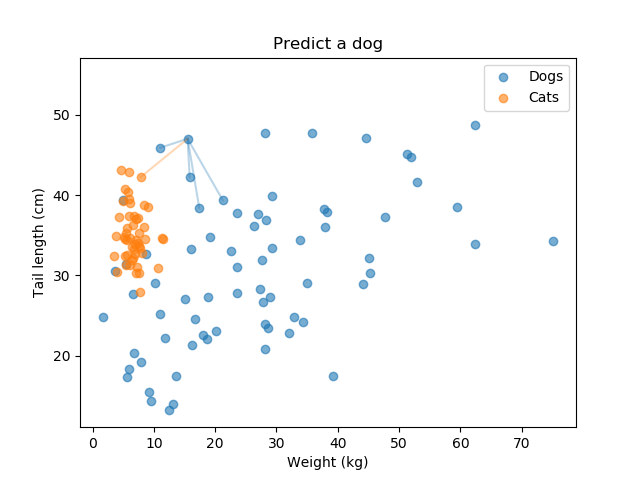

interactive(children=(FloatSlider(value=15.5, description='weight', max=70.0, step=0.01), Output()), _dom_clas…

interactive(children=(FloatSlider(value=47.0, description='tail', max=70.0, min=10.0, step=0.01), Output()), _…

In [3]:
%load_ext autoreload
%autoreload 2

from my_scripts.lesson4 import make_graph_1
make_graph_1()

## Decision boundaries

Hopefully from this interactive plot, you can see that, for every point on the graph we can associate a label. That is, given *any* new pair of measurements of weight and tail length, we can make a prediction: dog, or cat. 

This implies there is some dividing line between areas on the graph where we would predict a dog, and areas where we would predict a cat. This line is known as the **decision boundary**. Take a look at the graph below. This shows the decision boundary for the same data. 

<IPython.core.display.Javascript object>


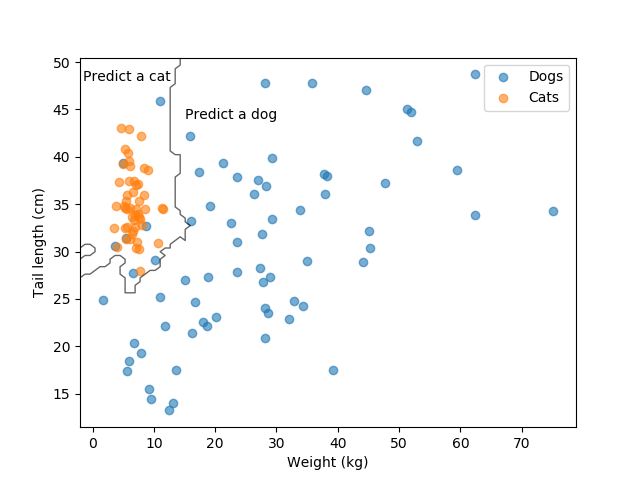

In [4]:
from my_scripts.lesson4 import make_graph_2
make_graph_2()

As you can see, the decision boundary for the k-nearest neighbours algorithm is actually pretty complicated! It's quite jagged and strange. 

## Exercise 1

Below you will see some code that looks like this 

```python
plot_decision_boundary(X, y, KNeighborsClassifier(n_neighbors=5))
```

This function, `plot_decision_boundary` takes in three arguments. The first, `X` is our data matrix. That's the table of measurements of weight and tail width for all the animals in our data set. The second, `y` are the associated labels for all those animals, where 1 indicates a dog and 0 indicates a cat. The final argument should be a scikit learn classifier. This is the scikit learn object that's able to fit data and make predictions. 

The function takes these three arguments and makes a matplotlib graph showing all the data and the decision boundary. 

Your task is this: 

1. try changing the number of neighbours used in the classifier all the way from 1 to 10 
2. What do you notice about the shape of the decision boundary and how it changes?
3. Given this, what number of neighbours would you choose for this data?

<IPython.core.display.Javascript object>


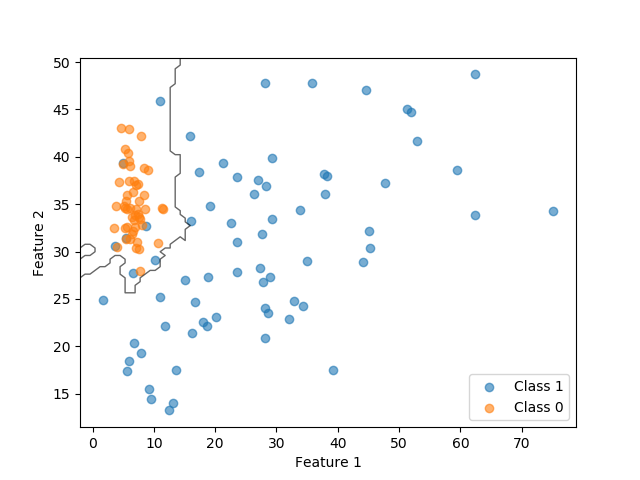

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from my_scripts.lesson4 import plot_decision_boundary, X, y

plot_decision_boundary(X, y, KNeighborsClassifier(n_neighbors=5))

## The most simple decision boundary: a line

Now the we understand the idea of a decision boundary, the question is: are there more ways of drawing it? The answer is yes! Possibly the most simple decision boundary we could draw is just a straight line. 

## Exercise 2 

Take a look at the graph below. It shows some new data that is classified into two different groups, like before with the cats and dogs. This time though we don't know exactly what the axes represent: this is just a *general* classification problem with no specific scenario attached to it yet. 

Your task is to find a decision boundary that separates the two data classes well. 

You can do this by varying the two parameters. They will move the decision boundary around on the graph (the first one adjusts the line height, and the second one adjusts the line angle)

1. Can you find a good decision boundary?
2. Why is your chosen boundary a good one?
3. What does accuracy mean in this case? 


<IPython.core.display.Javascript object>


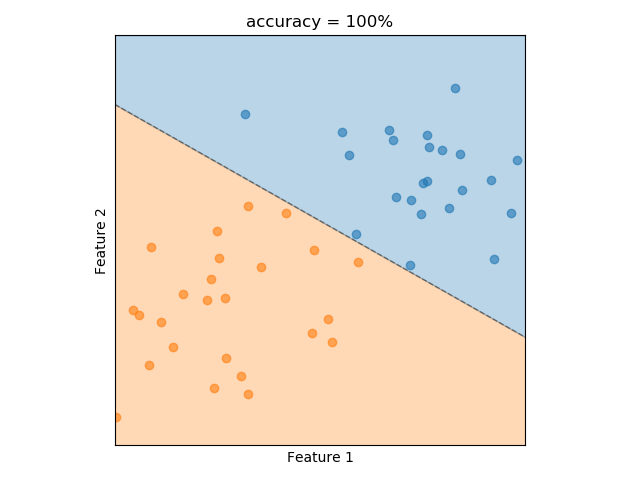

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0, step=0.001), Output()), _do…

interactive(children=(FloatSlider(value=45.0, description='b', max=180.0, min=-180.0, step=0.01), Output()), _…

In [42]:
from my_scripts.lesson4 import find_best_decision_bondary

find_best_decision_bondary()

Remember what the boundary means: everything on on the orange side we guess is one class while everything on the other side we guess is the other class. 

In this example we are actually able to fully separate the two classes. But what if we have a more realistic scenario where it's not fully possible to separate them?

## Exercise 3

Try to find the best decision boundary for the data below. 

1. What's the best accuracy you can get? 
2. Why are you not able to get 100% accuracy this time? 


<IPython.core.display.Javascript object>


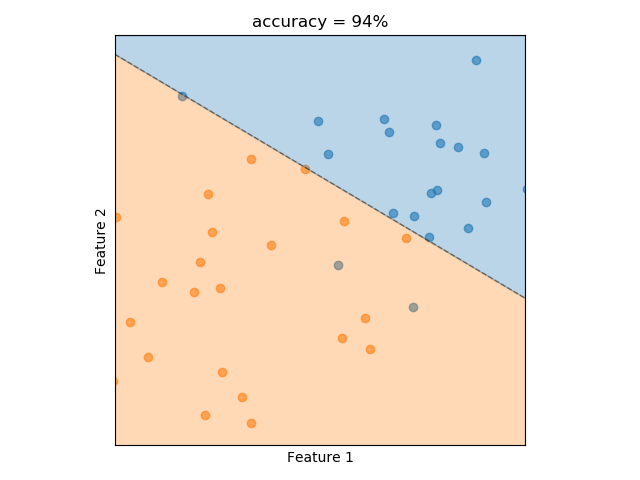

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0, step=0.001), Output()), _do…

interactive(children=(FloatSlider(value=45.0, description='b', max=180.0, min=-180.0, step=0.01), Output()), _…

In [73]:
from my_scripts.lesson4 import find_best_decision_bondary2

find_best_decision_bondary2()

## Beyond binary

In our work so far we have set the decision boundary which has only two (binary) options: yes or no, dog or cat, blue or orange, true or false. But can we go further?

Take a look at the plot above. There are some regions, like say the bottom left, where we are *sure* that the correct prediction in orange. Also, there are regions where we are *sure* that the correct prediction is blue, like the top right. However, there is some region in the middle where we can't fully be sure: is could be orange, it could be blue. 

In order to make an even better estimate, we can use the language of *probability*. Think back to the dog/cat example. Rather than saying 

> "I believe an animal with a weight of 15kg and a tail length of 35cm is a dog"

We say 

> "I believe there is an 80% chance that an animal with a weight of 15kg and a tail length of 35cm is a dog"

Think about what this means for our decision boundary. We could say that the boundary represents the measurements where there is a 50/50 chance that the item is one class or another. 

But then we could have multiple gradations: as we move further away from the boundary, we become more and more sure that the class is blue (or orange in the other direction). 

Check out the graph below. Here, we have plotted this situation. The more transparent the colour is, the less sure we are about what class it is. 

<IPython.core.display.Javascript object>


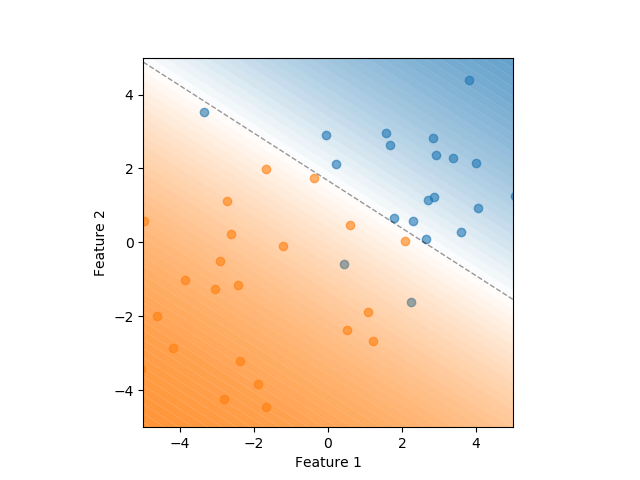

In [107]:
from my_scripts.lesson4 import graded_decision_boundary
  
graded_decision_boundary()

Let's consider the problem as the question: 

> *What is the probability that a point found here is blue?*

In essence, our new graded decision boundary says

* At the line, the probability of being blue is 0.5
* As we move away from the boundary into the blue territory, the probability of being blue increases. When we're really deep into this area, the probability essentially becomes 1.
* As we move away from the boundary into the orange territory, the probability of being blue decreases. When we're really deep into this area, the probability essentially becomes 0. 

The question is: 

> *How quickly does the probability become 1 as we move into the blue area? Or, equivalently, how quickly does the probability become 0 as we move into the orange area?* 


## Exercise 4

Take a look at the function below. This is called a *sigmoid* function. It has a parameter that can vary the shape. Have a play around with it. 

This is an example of a function we can use to assign a probability to a certain point that's a certain distance away from the boundary. 

Notice that, as the distance gets big in one direction, the probability always gradually goes towards 1. And in the other direction the probability gradually goes towards 0. 


<IPython.core.display.Javascript object>


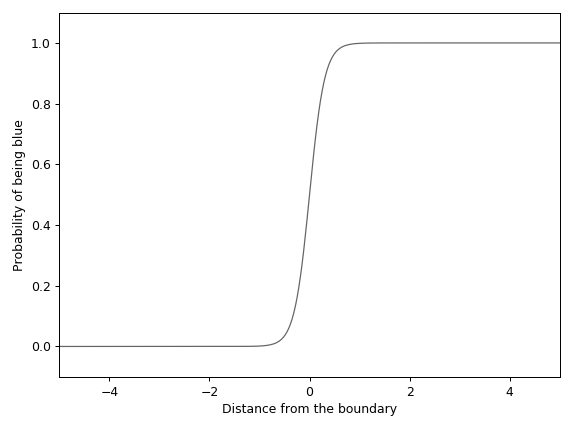

interactive(children=(FloatSlider(value=1.0, description='s', max=10.0, step=0.01), Output()), _dom_classes=('…

In [162]:
from my_scripts.lesson4 import sigmoid

sigmoid()

## Our second algorithm: Logistic Regression

Congratulations! If you've followed all that then you understand our second algorithm for classification. It's called logistic regression. The aim of this algorithm can be stated as follows:

1. Find the best boundary line. 
2. Find the best gradation of the probability

The details of exactly how we find the best settings for these is beyond the scope of this course, but if you're interested in finding out more, YouTube is a great place to start.

Scikit learn actually has a built-in logistic regression algorithm that we can use ourselves. Let's see how it works. 

Just as before, we import the model from scikit learn, and then initialise a classifier object. 




In [123]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

Next, we fit our classifier on the training data

In [124]:
classifier.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now we're ready to make a prediction! Note that now, we can either make a definite prediction, or alternatively. 

In [127]:
classifier.predict(X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [128]:
classifier.predict_proba(X)[:, 1]

array([1.  , 0.97, 1.  , 0.7 , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.99, 0.17, 1.  , 1.  , 0.42, 1.  , 1.  , 0.05, 0.1 , 1.  , 1.  , 0.99, 0.83, 0.96, 0.46, 0.86, 1.  , 0.89, 1.  , 0.94, 1.  , 0.99, 0.99, 0.96, 0.02, 0.16, 1.  , 1.  , 0.98, 1.  , 1.  , 0.81, 0.99, 0.33, 1.  , 1.  , 0.85, 1.  , 0.95, 0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 0.91, 1.  , 0.9 , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.98, 1.  , 1.  , 0.53, 0.03, 0.47, 0.12, 0.13, 0.02, 0.17, 0.09, 0.2 , 0.02, 0.07, 0.03,
       0.28, 0.17, 0.01, 0.17, 0.5 , 0.04, 0.07, 0.08, 0.14, 0.08, 0.12, 0.02, 0.07, 0.21, 0.03, 0.23, 0.32, 0.37, 0.05, 0.09, 0.24, 0.09, 0.29, 0.12, 0.2 , 0.14, 0.04, 0.18, 0.07, 0.1 , 0.06, 0.2 , 0.06, 0.2 , 0.63, 0.16, 0.15, 0.01])

<IPython.core.display.Javascript object>


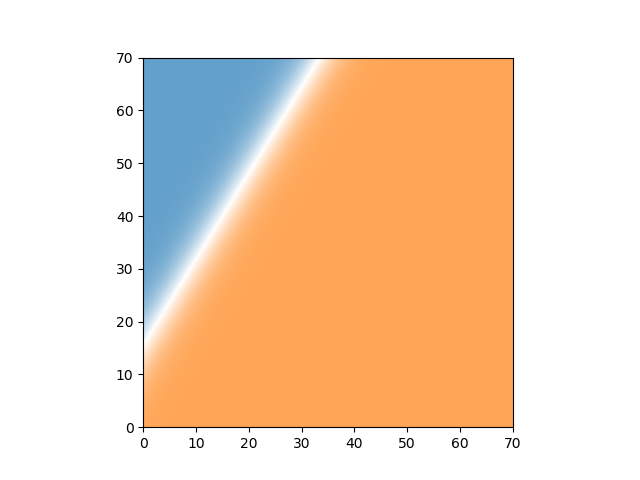

<IPython.core.display.Javascript object>


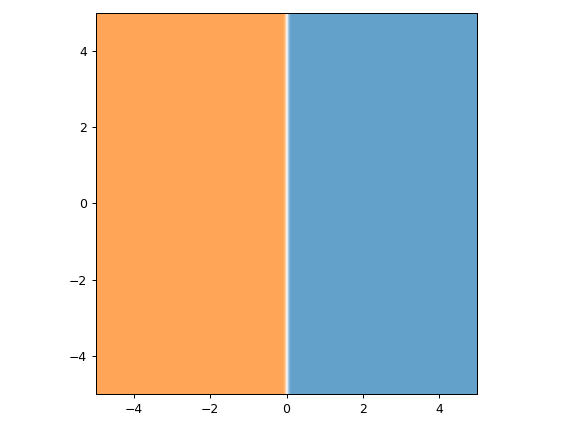

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0, step=0.001), Output()), _do…

interactive(children=(FloatSlider(value=45.0, description='b', max=180.0, min=-180.0, step=0.01), Output()), _…

interactive(children=(FloatSlider(value=1.0, description='s', max=2.0, min=0.03, step=0.01), Output()), _dom_c…

In [165]:
def ff():
    
    X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    X = np.vstack([X.reshape(-1), Y.reshape(-1)]).T
    
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#1f77b4", "#ffffff", "#ff7f0e"])

    fig, ax = plt.subplots()

    def f(a, b, s):
        return 1 / (1 + np.exp(- s * (a +  b * X[:, 0] + X[:, 1]))).reshape(100, 100)
    
    im = ax.imshow(f(0, -1, 0.1), origin='lower', interpolation='bicubic', extent=[-5, 5, -5, 5], cmap=cmap, vmin=0, vmax=1, alpha=0.7)
    
    
    class Line:
        
        def __init__(self):
            self.a = 0
            self.b = 45
            self.s = 1
        
        def update(self):
                            
            if self.b > 90 or self.b < -90:
                im.set_array(f(self.a, np.tan(self.b * np.pi / 180), self.s))
            else:
                im.set_array(1 - f(self.a, np.tan(self.b * np.pi / 180), self.s))
                
            
    
    line = Line()
    

    def update_a(a=0):
        line.a = a
        line.update()

    def update_b(b=45):
        line.b = b
        line.update()

    def update_s(s=1):
        line.s = s
        line.update()
    
    interact(update_a, a=(-10, 10, 0.001))
    interact(update_b, b=(-180, 180, 0.01))
    interact(update_s, s=(0.03, 2, 0.01))
    
    plt.tight_layout()
    
   

    
ff()